The data consists of 28x28 images in a csv file. The first column contains the label and all the other columns represent the pixel intensity at a given position in the pixel array with values between 0 and 255.

This attempt uses the [multilayer perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [21]:
import pandas as pd

X_train = pd.read_csv("data/sign_mnist_train.csv")
X_test = pd.read_csv("data/sign_mnist_test.csv")

# glimpse at the data
display(X_train)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [22]:
# separate labels
y_train = X_train.pop('label')
y_test = X_test.pop('label')

print(f"Amount of samples: Train {len(y_train)} vs. Test {len(y_test)}")

Amount of samples: Train 27455 vs. Test 7172


In [23]:
# values are 0-255 right now, scale them to 0.0-1.0 instead
X_train = X_train.divide(255)
X_test = X_test.divide(255)

X_train.iloc[0,]

pixel1      0.419608
pixel2      0.462745
pixel3      0.498039
pixel4      0.525490
pixel5      0.545098
              ...   
pixel780    0.807843
pixel781    0.807843
pixel782    0.800000
pixel783    0.796078
pixel784    0.792157
Name: 0, Length: 784, dtype: float64

In [24]:
# label is category
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
label_binarizer.fit(y_test)
y_train = label_binarizer.transform(y_train)
y_test = label_binarizer.transform(y_test)

y_train[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
from sklearn.neural_network import MLPClassifier

# first attempt with default params but few iterations
clf = MLPClassifier(random_state=1, max_iter=50).fit(X_train, y_train)

/home/admini/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
print(f"Accuracy: {clf.score(X_test, y_test):.2f}")
print(f"Loss ({clf.loss}): {clf.loss_:.5f}")

Accuracy: 0.58
Loss (log_loss): 0.17155


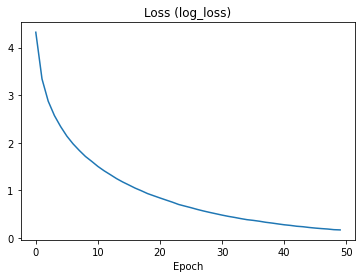

In [27]:
import matplotlib.pyplot as plt

plt.plot(clf.loss_curve_)
plt.title(f"Loss ({clf.loss})")
plt.xlabel("Epoch")
plt.show()